In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
from scipy.stats import mode

In [0]:
x = loadmat('digits')
xtr = x['xTr']
ytr = x['yTr']
xte = x['xTe']
yte = x['yTe']

In [0]:
fac = loadmat('faces.mat')
fxtr = fac['xTr']
fytr = fac['yTr']

In [6]:
x.keys()

dict_keys(['__header__', '__version__', '__globals__', 'xTr', 'xTe', 'yTr', 'yTe'])

In [7]:
xtr.shape 


(256, 7291)

In [8]:
ytr.shape

(1, 7291)

In [9]:
np.unique(ytr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

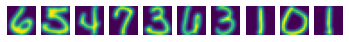

In [10]:
n = 10
for i in range(n):
  plt.subplot(1,n,i+1)
  imgarr = xtr [:,i]
  imgarr = imgarr.reshape(16,16)
  imgarr = imgarr.T
  plt.axis('off')
  plt.imshow(imgarr)


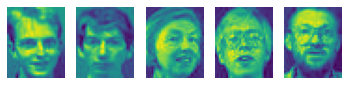

In [11]:
p = 5
for i in range(p):
  img = fxtr[:,i]
  img = img.reshape(31,38)
  img = img.T
  plt.subplot(1,p,i+1)
  plt.axis('off')
  plt.imshow(img)

In [12]:
xte.shape[1] == yte.shape[1]

True

In [0]:
def InnerProduct(X, Z = np.array([])):
  if Z.size == 0:
    Z = X
  G = np.matmul(X.T,Z)
  return G

In [0]:
def l2distance(X,Z):
  # transpose[ diagonals(S) ] + diagonals(R) + G
  # Where G R and S are:
  # G = X.Z
  # R = Z.Z
  # S = X.X 
  n = X.shape[1]
  m = Z.shape[1]
  D = np.zeros((n,m))
  G = InnerProduct(X,Z)
  S = InnerProduct(X)
  S = np.diag(S).reshape(S.shape[0],1)
  R = np.diag(InnerProduct(Z))
  D = (-2*G + R) + S
  return D

   

In [0]:
def findknn(xtr,xte,k):
  d = l2distance(xtr,xte)
  D = np.sort(d, axis = 0 )[:k,:]
  I = (np.argsort(d,axis = 0)+1)[:k,:]
  return [I,D]

In [0]:
def analyze(kind, truth , pred):
  if kind == 'acc':
    acc = ((pred == truth).sum())/np.size(truth)
    return acc


In [17]:
analyze('acc',np.array([1, 2, 1, 2]),np.array([1, 2, 1, 1]))

0.75

In [0]:
def knnclassifier(xtr,ytr,xte,k):
  ind,dist = findknn(xtr,xte,k)
  func = lambda x : ytr[0,x-1]
  t = np.vectorize(func)
  h = t(ind)
  pred, _ = mode(h)
  return pred


In [19]:
analyze("acc",yte,knnclassifier(xtr,ytr,xte,3))

0.9481813652217239